In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# (a) Treat each data entry as a 2 dimensional feature vector. Parse and plot all data points on 2-D plane.

In [504]:
# Load Data
data = []
for line in open("./old-faithful-geyser/data.txt"):
    # Treat each data entry as a 2 dimensional feature vector
    entry = []
    entry.append(line.strip().split()[1])
    entry.append(line.strip().split()[2])
    vector = np.array(entry, dtype=float)
    data.append(vector)
# Convert List to Vector
data = np.array(data)
# Insepect data
print("Shape of the data: \n" + str(data.shape) + ", where " + str(data.shape[0]) + 
      " is the number of entry, and " + str(data.shape[1]) +" is the dimension of the feature vector.")
print("\n Inspect the First 10 elements in the data:")
print(str(data[:10]))

Shape of the data: 
(272, 2), where 272 is the number of entry, and 2 is the dimension of the feature vector.

 Inspect the First 10 elements in the data:
[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]
 [ 2.883 55.   ]
 [ 4.7   88.   ]
 [ 3.6   85.   ]
 [ 1.95  51.   ]
 [ 4.35  85.   ]]


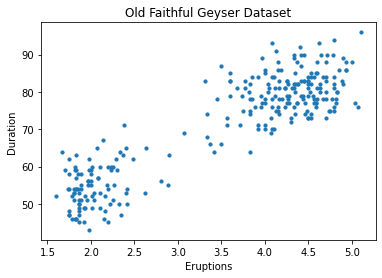

In [391]:
# Parse and plot all data points on 2-D plane.
plt.scatter(data[:,0], data[:,1], s=10)
plt.xlabel('Eruptions')
plt.ylabel('Duration')
plt.title('Old Faithful Geyser Dataset')
plt.savefig("geyser_data_points") # save pics
plt.show()

# (d)  Implement and run the EM algorithm
## (i) EM implementation

In [524]:
import numpy as np
from scipy.stats import multivariate_normal as mv_normal
import matplotlib.pyplot as plt

# Implement a bimodal GMM model fit using the EM algorithm
class gmm:
    # Initialization: cluster, dimension, and random state
    def __init__(self, n_clusters=2, n_dimensions=2, random_state=None):
        self.n_clusters = n_clusters
        self.n_dimensions = n_dimensions
        self.rng = np.random.default_rng(seed=random_state)
        
    # Implement a bimodal GMM model fit using the EM algorithm
    # X: data set
    # tol: convergence threshold
    def fit(self, X, tol=1e-12):
        # n: number of data entry, d: dimension of feature vector
        n, d = X.shape
        # k: number of clusters
        k = self.n_clusters

        # E Step: Compute the posterior probability that each Gaussian generates each datapoint
        def e_step(priors, means, covars):
            resps = np.ndarray((n, k))
            for i in range(k):
                resps[:, i] = priors[i] * mv_normal.pdf(X,means[i],covars[i])
            return resps / resps.sum(axis=1)[:, np.newaxis]
        
        # M Step: Assuming that the data really was generated this way, 
        # change the parameters of each Gaussian to maximize the probability that 
        # it would generate the data it is currently responsible for.
        def m_step(resps):
            totals = resps.sum(axis=0)
            priors = totals / n
            means  = (resps.T @ X) / totals[:, np.newaxis]
            covars = np.ndarray(shape=(k, d, d))
            for i in range(k):
                X_centered = X - means[i]
                covars[i] = (resps[:, i]*X_centered.T) @ X_centered/totals[i]
            return priors, means, covars
        
        # Initialization: random hard cluster assignments
        Z = np.zeros((n, k))
        Z[np.arange(n), self.rng.choice(k, n)] = 1
        T = m_step(Z)

        # loop until convergence:
        converged = False
        iteration = 0
        mean_list = []
        
        plt.figure(figsize=(40, 80))
        
        while not converged:
            T0 = T
            Z  = e_step(*T)
            T  = m_step(Z)
            # get list of mu
            mean_list.append(T[1])
            # get plot of each iteration
            arr1, arr2 = [], []
            for i in range(0, 272):
                if Z[i][0] > Z[i][1]:
                    arr1.append(X[i])
                else:
                    arr2.append(X[i])
            arr1, arr2 = np.array(arr1), np.array(arr2)
            plt.subplot(11, 4, iteration + 1)
            plt.scatter(arr1[: , 0], arr1[: , 1], s=10, c='r', linewidth=0.1)
            plt.scatter(arr2[: , 0], arr2[: , 1], s=10, c='g', linewidth=0.1)
            # plot the center
            plt.scatter(*T[1].T, c=['c', 'm'])
            plt.title("Iteration #%s" % (iteration + 1))
            iteration = iteration + 1
            # check sum of squared mean distances to detect convergence
            # where tol is the convergence threshold
            converged = np.sum(np.square(T0[1]-T[1])) < tol
        
        plt.savefig("em_iteration.png", bbox_inches='tight', pad_inches=0) # save pics
        
        # Plot the final clustering when reached termination criterion
        fig, ax = plt.subplots()
        arr1, arr2 = [], []
        for i in range(0, 272):
            if Z[i][0] > Z[i][1]:
                arr1.append(X[i])
            else:
                arr2.append(X[i])
        arr1, arr2 = np.array(arr1), np.array(arr2)
        ax.scatter(arr1[: , 0], arr1[: , 1], s=10, c='r', linewidth=0.1)
        ax.scatter(arr2[: , 0], arr2[: , 1], s=10, c='g', linewidth=0.1)
        cs = ax.scatter(*T[1].T, c=['c', 'm'], s=100) # plot the center
        plt.savefig("em_final_clustering") # save pics
        fig.canvas.draw()
        # Print out the total number of iteration
        print("Total Number of Iteration: %s" % iteration)
        
        # save list of mean through iteration
        self.mean_list = mean_list
        return self

Total Number of Iteration: 30


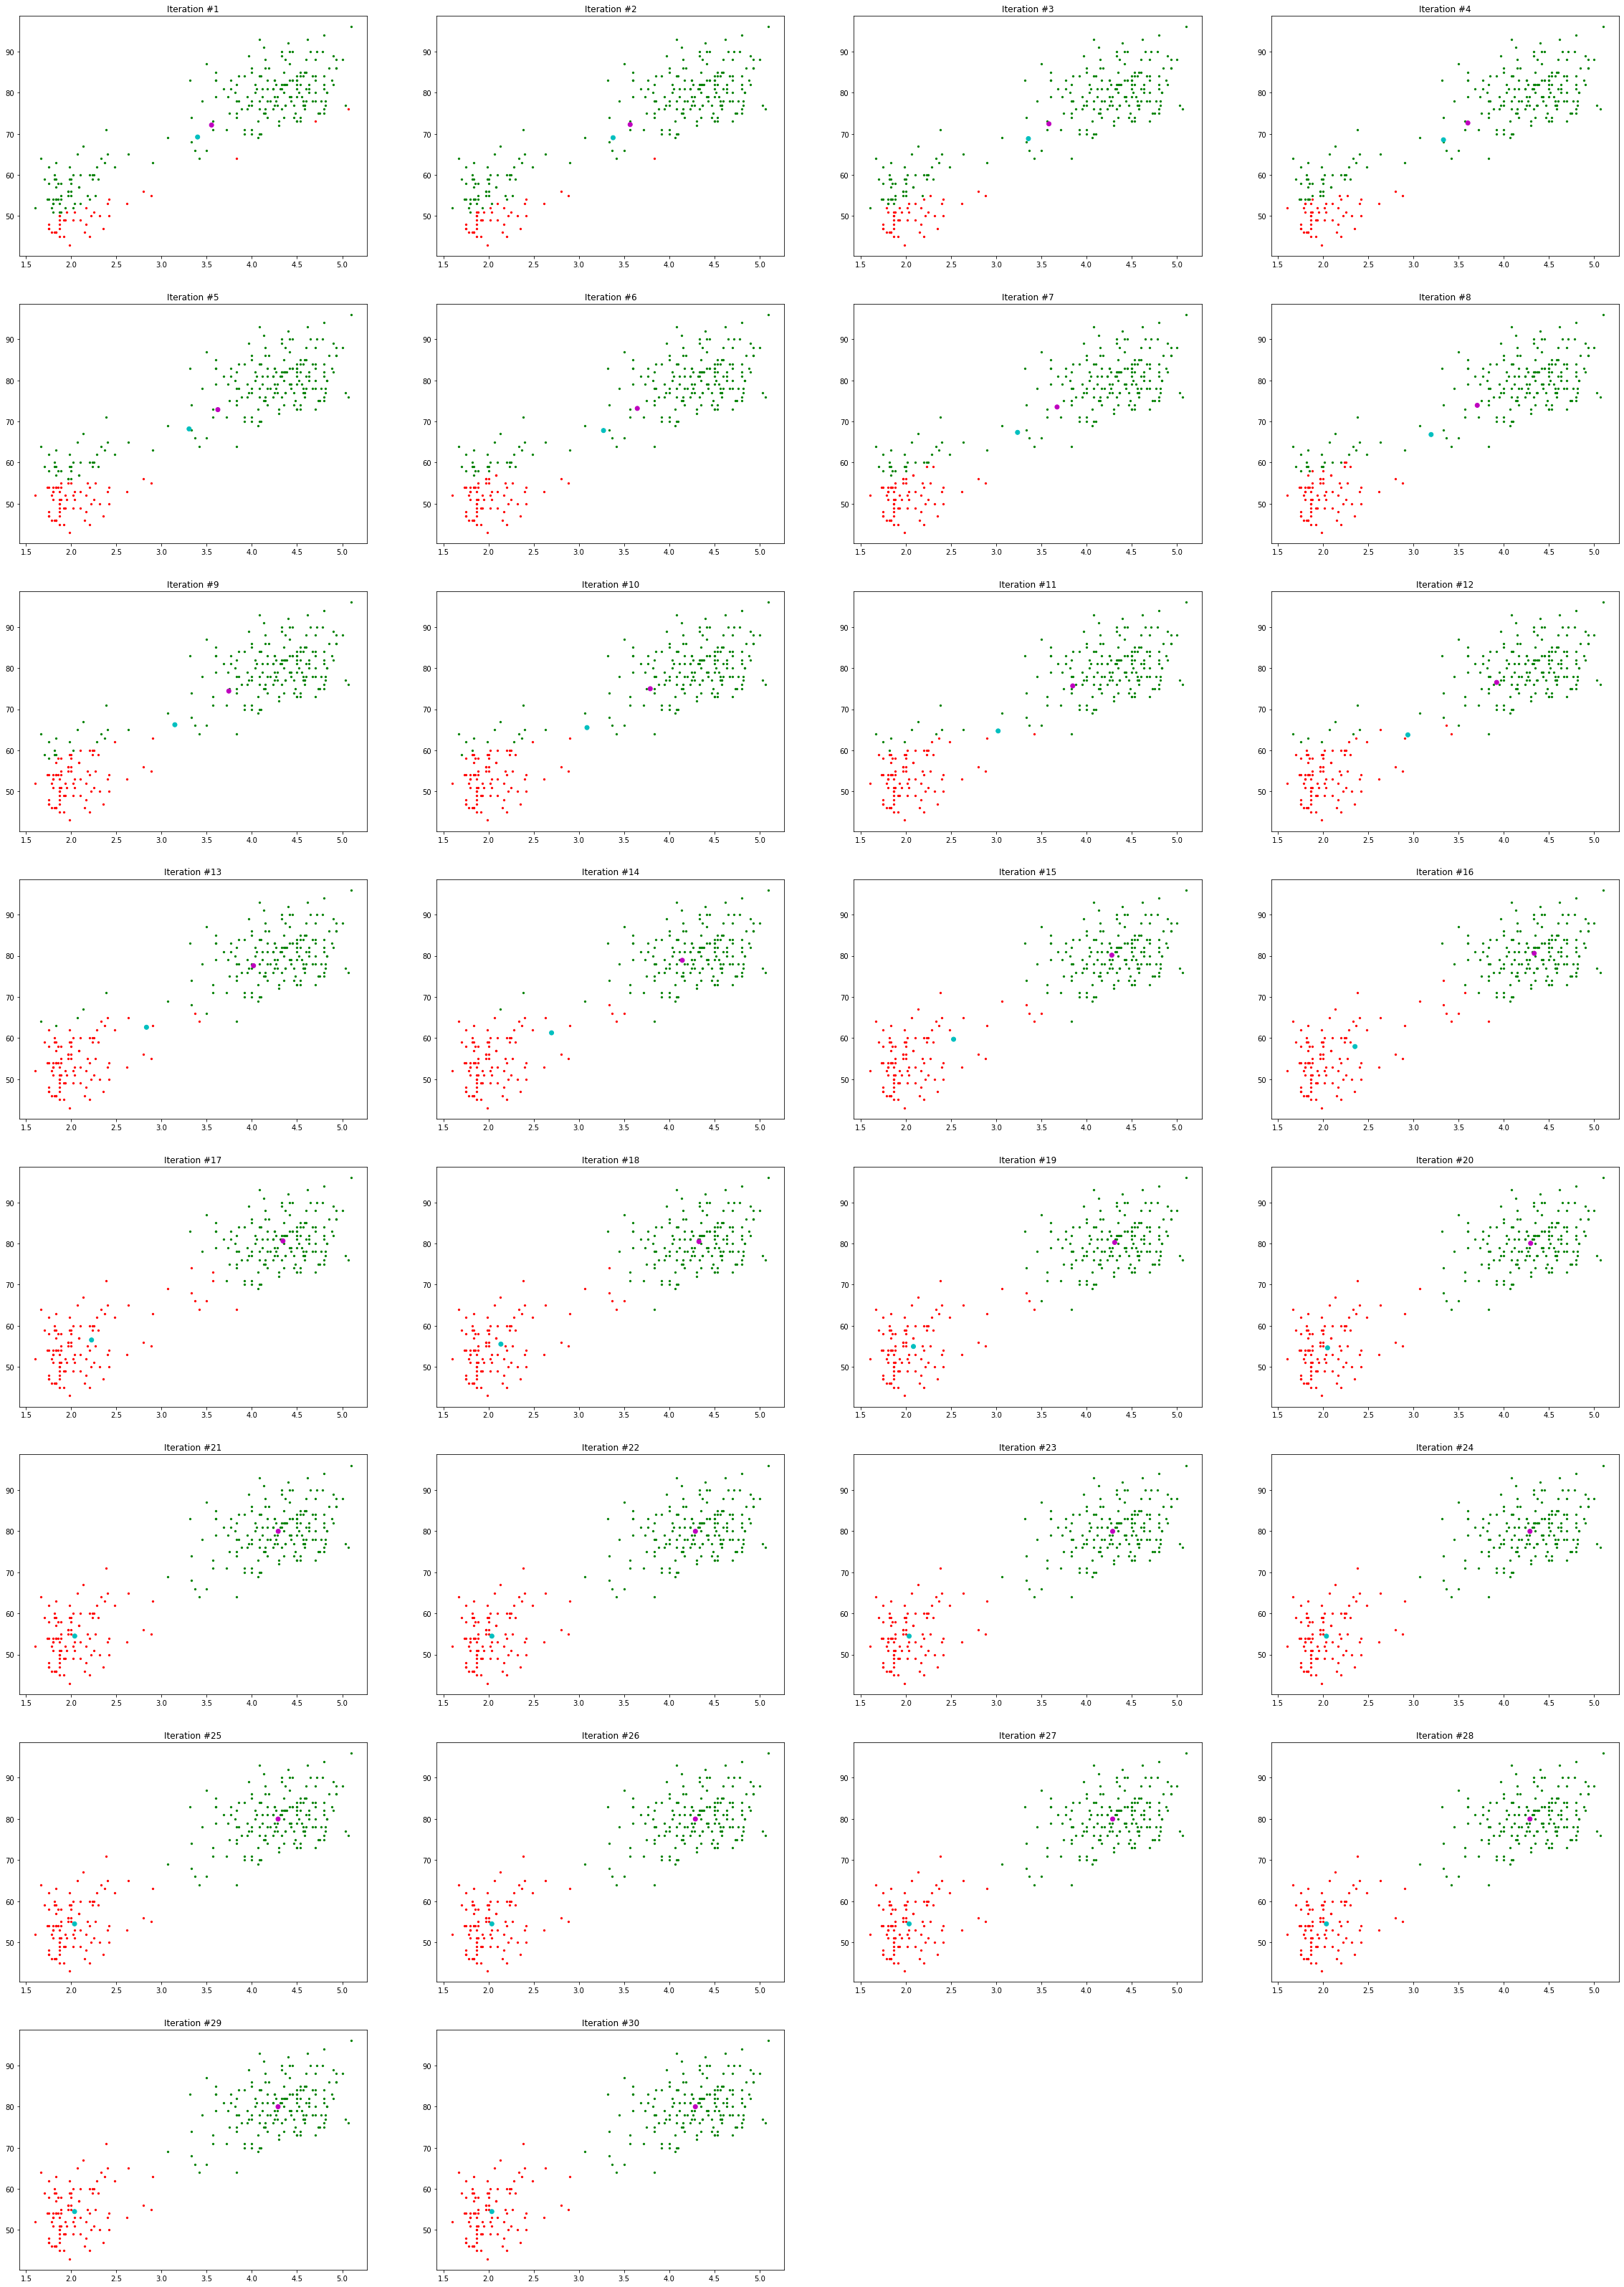

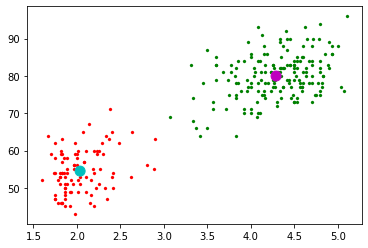

In [525]:
# fit the model
G = gmm().fit(data)
# obtain the mean list for next question
mean_list = G.mean_list

## (iii) Plot the trajectories of the two mean vectors (µ1 and µ2) in 2 dimensions to show how they change over the course of running EM.

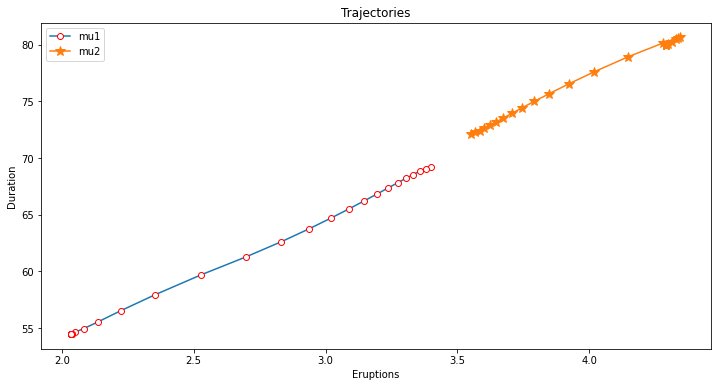

In [527]:
x1 = []
y1 = []
x2 = []
y2 = []

# Obtain mu from the mean list
for i in range(len(mean_list)):
    x1.append(mean_list[i][0][0])
    y1.append(mean_list[i][0][1])
    x2.append(mean_list[i][1][0])
    y2.append(mean_list[i][1][1])

# Plot the trajectories of the two mean vectors (µ1 and µ2) in 2 dimensions 
# to show how they change over the course of running EM.
plt.figure(figsize=(12, 6))
plt.plot(x1, y1, marker='o', mec='r', mfc='w', label='mu1')
plt.plot(x2, y2, marker='*', ms=10, label='mu2')
plt.legend()
plt.xlabel('Eruptions')
plt.ylabel('Duration')
plt.title("Trajectories")
plt.savefig("em_trajectories") # save pics
plt.show()

In [540]:
# print out the center using gmm with em implementation
em_center = [[x1[len(mean_list) - 1], y1[len(mean_list) - 1]], 
             [x2[len(mean_list) - 1], y2[len(mean_list) - 1]]]
# Output here is [[2.0363884598395923, 54.47851642946882], [4.2896619777147755, 79.96811522972116]]
print("GMM-EM implementation - the centers are " + str(em_center))

GMM-EM implementation - the center is [[2.0363884598395923, 54.47851642946882], [4.2896619777147755, 79.96811522972116]]


# (e) K-means clustering

K-means clustering - the centers are [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


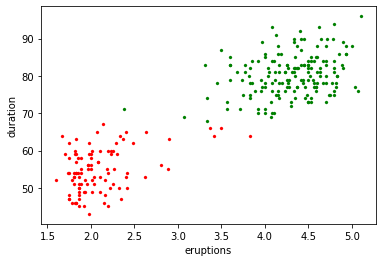

In [547]:
# Import the sklearn package
from sklearn.cluster import KMeans
# Experiment with K-means clustering on the same dataset with K = 2
kmeans = KMeans(n_clusters=2).fit(V, 2)
# Print out the centers
print("K-means clustering - the centers are " + str(kmeans.cluster_centers_))

# Get the plot
label = kmeans.labels_
cluster1, cluster2 = [], []
# Seperate data points into two clusters
for l, d in zip(label, data):
    if label[l] == 0:
        cluster1.append(d)
    else:
        cluster2.append(d)
cluster1, cluster2 = np.array(cluster1), np.array(cluster2)
# Display the scatter plot
plt.scatter(cluster1[:, 0], cluster1[:, 1], s=10, c='g', linewidth=0.1)
plt.scatter(cluster2[:, 0], cluster2[:, 1], s=10, c='r', linewidth=0.1)
plt.xlabel('eruptions')
plt.ylabel('duration')
plt.savefig('k_means_clustering') # save pics